<a href="https://colab.research.google.com/github/bui-anh-tuan/BTTH1/blob/main/Time_series_6_5_2025_BTH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
a = (2251262653%7+1)
a

4

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
!pip install pykalman
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 11.1 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/train.csv')

# Lọc Thursday
df_thursday = df[df['Publication_Day'] == 'Thursday']
df_thursday

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
10,10,Sports Central,Episode 66,106.41,Sports,84.29,Thursday,Evening,32.84,3.0,Positive,74.08016
15,15,Tech Talks,Episode 47,68.33,Technology,75.33,Thursday,Evening,92.90,0.0,Neutral,63.97718
...,...,...,...,...,...,...,...,...,...,...,...,...
749949,749949,Home & Living,Episode 59,28.98,Lifestyle,43.98,Thursday,Morning,74.73,0.0,Positive,23.98220
749966,749966,Sports Weekly,Episode 23,30.28,Sports,79.44,Thursday,Night,18.03,3.0,Neutral,24.10779
749985,749985,Wellness Wave,Episode 54,115.30,Health,99.15,Thursday,Night,NaN,1.0,Negative,69.31826
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000


In [ ]:
!pip install filterpy
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=0b5ee68cf1772574746ee9a5dbe49722291275aacfe13ca1bcbc47684f000872
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


**Basic Kalmann Filter**





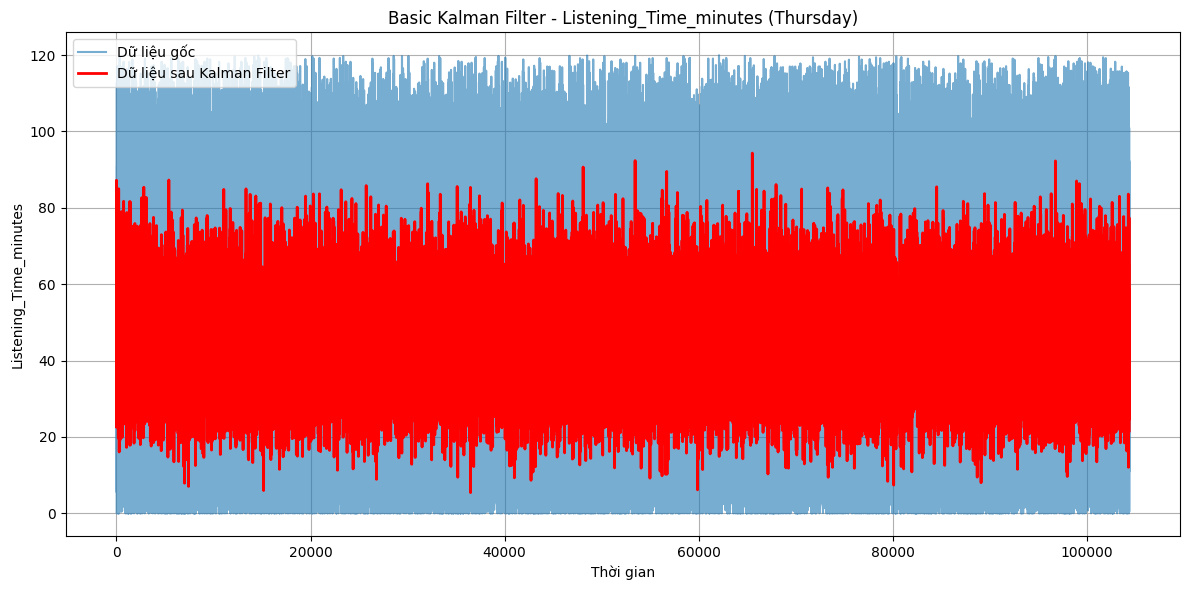

In [10]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
data_col = 'Listening_Time_minutes'
data = df_thursday[data_col].dropna().values

# Khởi tạo Basic Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([data[0], 0.])  # giá trị ban đầu, tốc độ
kf.F = np.array([[1., 1.], [0., 1.]])  # ma trận chuyển đổi trạng thái
kf.H = np.array([[1., 0.]])           # ma trận đo
kf.P *= 1000.                         # hiệp phương sai ban đầu
kf.R = 10                             # nhiễu đo
kf.Q = Q_discrete_white_noise(dim=2, dt=1, var=0.01)  # Nhiễu hệ thống

# Lọc tuần tự
filtered = []
for z in data:
    kf.predict()
    kf.update(z)
    filtered.append(kf.x[0])

plt.figure(figsize=(12, 6))
plt.plot(data, label='Dữ liệu gốc', alpha=0.6)
plt.plot(filtered, label='Dữ liệu sau Kalman Filter', color='red', linewidth=2)
plt.title('Basic Kalman Filter - Listening_Time_minutes (Thursday)')
plt.xlabel('Thời gian')
plt.ylabel('Listening_Time_minutes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Smooth Kalmann Filter**

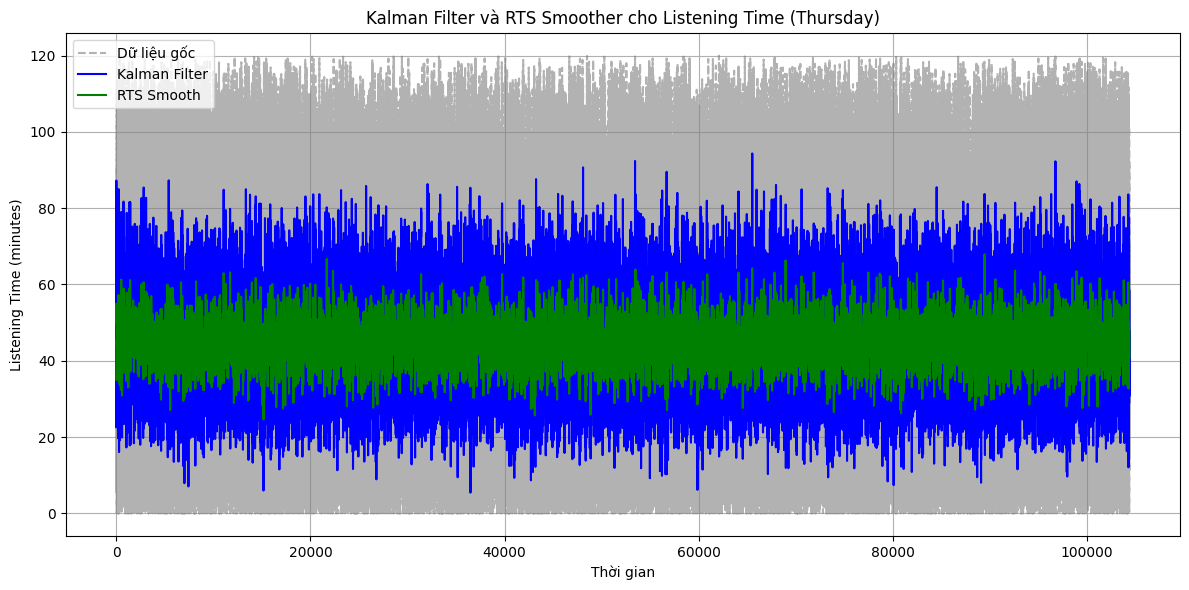

In [12]:
# Làm mượt bằng RTS smoother

# Re-run the Kalman filter to store mu and cov for smoothing
mu = []
cov = []
kf_smooth = KalmanFilter(dim_x=2, dim_z=1)
kf_smooth.x = np.array([data[0], 0.])  # initial value, velocity
kf_smooth.F = np.array([[1., 1.], [0., 1.]])  # state transition matrix
kf_smooth.H = np.array([[1., 0.]])           # measurement matrix
kf_smooth.P *= 1000.                         # initial covariance
kf_smooth.R = 10                             # measurement noise
kf_smooth.Q = Q_discrete_white_noise(dim=2, dt=1, var=0.01)  # process noise


for z in data:
    kf_smooth.predict()
    kf_smooth.update(z)
    mu.append(kf_smooth.x)
    cov.append(kf_smooth.P)

mu = np.array(mu)
cov = np.array(cov)


smoothed_mu, smoothed_cov, _, _ = kf_smooth.rts_smoother(mu, cov)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data, label='Dữ liệu gốc', color='gray', linestyle='--', alpha=0.6)
plt.plot(mu[:, 0], label='Kalman Filter', color='blue')
plt.plot(smoothed_mu[:, 0], label='RTS Smooth', color='green')
plt.title('Kalman Filter và RTS Smoother cho Listening Time (Thursday)')
plt.xlabel('Thời gian')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Dự báo**

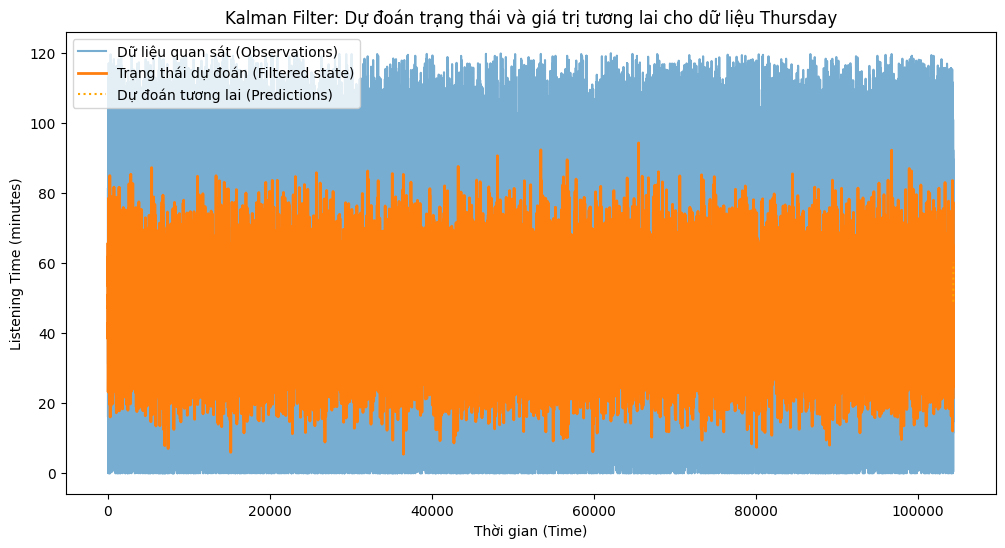

In [14]:
# Kalman Filter với tham số cố định
class SimpleKalmanFilter:
    def __init__(self, initial_state, initial_covariance, process_covariance, measurement_covariance):
        self.state = initial_state  # Trạng thái ban đầu
        self.covariance = initial_covariance  # Hiệp phương sai ban đầu
        self.process_covariance = process_covariance  # Nhiễu hệ thống (Q)
        self.measurement_covariance = measurement_covariance  # Nhiễu đo (R)

    def predict(self):
        # Tiên đoán trạng thái tiếp theo
        self.state = self.state  # Trạng thái không thay đổi
        self.covariance = self.covariance + self.process_covariance  # Cập nhật hiệp phương sai dựa vào nhiễu

    def update(self, measurement):
        # Cập nhật trạng thái với phép đo mới (z_k = H * x_k + v_k)
        kalman_gain = self.covariance / (self.covariance + self.measurement_covariance)
        self.state = self.state + kalman_gain * (measurement - self.state)
        self.covariance = (1 - kalman_gain) * self.covariance

# Lọc dữ liệu quan sát
filtered_state = []

# Lọc qua tất cả các dữ liệu quan sát
for z in data:
    kf.predict()  # Tiên đoán giá trị tiếp theo
    kf.update(z)  # Cập nhật với giá trị thực tế
    filtered_state.append(kf.x[0])

# Dự đoán giá trị tương lai
future_steps = 10  # Dự đoán 10 bước tiếp theo
predictions = []

# Tiên đoán giá trị cho các bước tiếp theo mà không có dữ liệu quan sát
for _ in range(future_steps):
    kf.predict()  # Tiên đoán giá trị cho bước tiếp theo
    predictions.append(kf.x[0])

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(data, label='Dữ liệu quan sát (Observations)', alpha=0.6)
plt.plot(filtered_state, label='Trạng thái dự đoán (Filtered state)', linewidth=2)
plt.plot(range(len(data), len(data) + future_steps), predictions, label='Dự đoán tương lai (Predictions)', linestyle='dotted', color='orange')
plt.legend()
plt.title("Kalman Filter: Dự đoán trạng thái và giá trị tương lai cho dữ liệu Thursday")
plt.xlabel("Thời gian (Time)")
plt.ylabel("Listening Time (minutes)")
plt.show()